<a href="https://colab.research.google.com/github/Apoorv1401/Ml_From_Scratch/blob/main/Splitting_a_dataset_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state = 0)

In [6]:
X_train.shape

(112, 4)

In [7]:
X_train[:5]

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3]])

In [8]:
X_test.shape

(38, 4)

In [9]:
#one way to check the data is to do a pair plot like in the previous file. It can work if we have less features like 4 here, but what if there
#are 100 features. And also the pair plots oes not show the interaction of all of features at once, so some interesting aspects of the data may not be revealed when visualizing it this way.


In [10]:
#In scikit learn the models are implemented in their own classes. The first one we are looking at is K nearest neighbors implemented in
#KNeighborsClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
import numpy as np

In [15]:
X_new = np.array([[5.2, 2.8, 4, 1]])

In [16]:
X_new.shape

(1, 4)

In [17]:
prediction = knn.predict(X_new)

In [18]:
print(prediction)
print(iris['target_names'][prediction])

[1]
['versicolor']


In [19]:
#check the accuracy of the model

y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

In [20]:
knn.score(X_test, y_test)

0.9736842105263158

In [21]:
#using genfromtext to load the iris data
from google.colab import files
uploaded = files.upload()

In [23]:
X = np.genfromtxt('iris_data.txt')

In [31]:
#Lets check if dataset same or not
np.mean(X == iris['data'])

0.995

In [32]:
#The above value shows that the values are similar

In [34]:
y = np.genfromtxt('iris_target.txt')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [35]:
#We cna check the test error rate by plotting differnt values of k
test_error = []
k = [1, 5, 10, 20, 30, 40, 50, 80]
for K_neigbors in k:
  knn = KNeighborsClassifier(n_neighbors=K_neigbors)
  knn.fit(X_train, y_train)
  test_error.append(1-knn.score(X_test, y_test))


In [39]:
test_error

[0.02631578947368418,
 0.02631578947368418,
 0.02631578947368418,
 0.02631578947368418,
 0.052631578947368474,
 0.13157894736842102,
 0.10526315789473684,
 0.368421052631579]

Text(0, 0.5, 'Error rate')

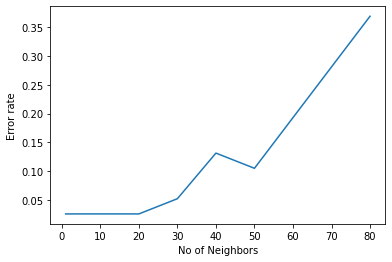

In [40]:
#plotting the error rate
import matplotlib.pyplot as plt

plt.plot(k, test_error)
plt.xlabel('No of Neighbors')
plt.ylabel('Error rate')

In [41]:
#We can see the error rate which is constant in the beginning suddenly starts increasing as K increases so more neighbors is always not a good idea.
#Some other factors at play can be not a large amount a data, the data is quite clean